In [1]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

## Import Data

In [4]:
df = pd.read_excel('process_data/GPP_6210501001_real.xlsx',sheet_name="LopBuri",index_col="Year") #ตัวอย่าง
df.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดลพบุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สำหรับปลูกพืชไร่ (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
Year,,,,,,,,,,,,,,,,,,,,,
1995,5391.575854,19.009823,7176.043232,590.238706,142.277622,3391.005101,3484.507633,1016.736730,176.898917,195.790885,...,48.223830,37.278020,59467272,0.11918,14642.057073,2.918084e+06,1.193555e+06,813441.826432,17,143862.554
1996,6206.682558,37.744703,6810.317457,677.218307,137.423999,7728.645631,3737.141208,1113.256820,153.858116,224.369211,...,45.255728,37.081286,60130190,0.11918,14781.331342,2.855555e+06,1.188872e+06,813529.791485,18,171503.917
1997,6014.415215,36.238535,6988.106194,817.941119,149.159330,5647.894247,4542.778789,1172.783861,140.141879,234.727143,...,46.814732,36.564600,60846588,0.10214,14820.227125,2.838092e+06,1.187564e+06,813554.357901,19,179223.451
1998,6270.177149,28.193053,5739.574622,1090.869869,130.489143,3182.288913,4987.801949,1245.856126,474.662929,229.726314,...,42.303171,36.111727,61585103,0.17525,14827.222516,2.834951e+06,1.187329e+06,813558.776161,19,180611.806
1999,5684.674097,42.046276,4594.756351,958.722269,143.734495,2304.876078,4652.336854,1226.177795,564.896952,241.436570,...,44.267746,36.378900,62298569,0.24836,14873.804036,2.814037e+06,1.185763e+06,813588.196856,20,189856.706


In [5]:
df.shape

(24, 31)

In [6]:
list1 = list(df.columns.values)

In [7]:
input_vars = list1[:-1]
len(input_vars)

30

In [8]:
input_vars

['Agriculture, forestry and fishing',
 'Mining and quarrying',
 'Manufacturing',
 'Electricity, gas, steam and air conditioning supply',
 'Water supply; sewerage, waste management and remediation activities',
 'Construction',
 'Wholesale and retail trade and repair of motor vehicles',
 'Transportation and storage',
 'Accommodation and food service activities',
 'Information and communication',
 'Financial and insurance activities',
 'Real estate activities',
 'Professional, scientific and technical activities',
 'Administrative and support service activities',
 'Public administration and defence; compulsory social security',
 'Education',
 'Human health activities',
 'Arts, entertainment and recreation',
 'Other service activities',
 'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี)',
 'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี)',
 'จำนวนประชากรทั้งหมด (คน)',
 'ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็

## Regression before Feature Selection

In [9]:
X1 = df[input_vars]
y1 = df['GPP Per capita (Baht)']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=14)
lm = LinearRegression()
lm.fit(X1_train, y1_train)
y_pred = lm.predict(X1_test)
#[np.sqrt(metrics.mean_squared_error(y1_test,y_pred)),metrics.r2_score(y1_test,y_pred)]

In [10]:
#dataframe
table1 = pd.DataFrame({'R_square': [metrics.r2_score(y1_test,y_pred)], 
                       'RMSE': [np.sqrt(metrics.mean_squared_error(y1_test,y_pred))]}, index=['Linear Regression'])
table1

,R_square,RMSE
Linear Regression,0.611635,71304.574365


## Filter Methods

#### Low Variance Filtering

In [11]:
df.var()

Agriculture, forestry and fishing                                      2.436746e+07
Mining and quarrying                                                   1.235088e+05
Manufacturing                                                          1.168548e+08
Electricity, gas, steam and air conditioning supply                    3.302912e+05
Water supply; sewerage, waste management and remediation activities    8.044009e+03
Construction                                                           1.839427e+06
Wholesale and retail trade and repair of motor vehicles                4.667970e+06
Transportation and storage                                             2.249144e+05
Accommodation and food service activities                              2.166526e+04
Information and communication                                          1.583691e+04
Financial and insurance activities                                     1.636214e+06
Real estate activities                                                 3.743

In [12]:
# After scanning variances from all features above, set minimum variance threshold = 15 
# Note that minimum variance threshold can be set to any value

# Below is to remove features with low variances
# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features with variance >= minimum variance threshold

min_var_threshold = 10000000
updated_vars = [ ]
for i in range(0,len(df[input_vars].var())):

    if df[input_vars].var()[i] >= min_var_threshold:   
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Agriculture, forestry and fishing',
 'Manufacturing',
 'Public administration and defence; compulsory social security',
 'จำนวนประชากรทั้งหมด (คน)',
 'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
 'เนื้อที่สำหรับปลูกพืชไร่ (ไร่)']

In [13]:
len(updated_vars)

6

In [14]:
# Above, there are 3 features with variance >= minimum variance threshold
# Create new data frame with these 3 features and 1 output

df2 = df[updated_vars]
#df2['จำนวนประชากรทั้งหมด (คน)']=df1['จำนวนประชากรทั้งหมด (คน)']
df2.head()

,"Agriculture, forestry and fishing",Manufacturing,Public administration and defence; compulsory social security,จำนวนประชากรทั้งหมด (คน),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สำหรับปลูกพืชไร่ (ไร่)
Year,,,,,,
1995,5391.575854,7176.043232,4819.953569,59467272,2.918084e+06,1.193555e+06
1996,6206.682558,6810.317457,5143.685760,60130190,2.855555e+06,1.188872e+06
1997,6014.415215,6988.106194,5642.858721,60846588,2.838092e+06,1.187564e+06
1998,6270.177149,5739.574622,6305.856834,61585103,2.834951e+06,1.187329e+06
1999,5684.674097,4594.756351,6774.325274,62298569,2.814037e+06,1.185763e+06


In [15]:
X = df2[updated_vars]
y = df['GPP Per capita (Baht)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[35104.867241659245, 0.9058674607872382]

#### High Correlation Filtering

<AxesSubplot:>

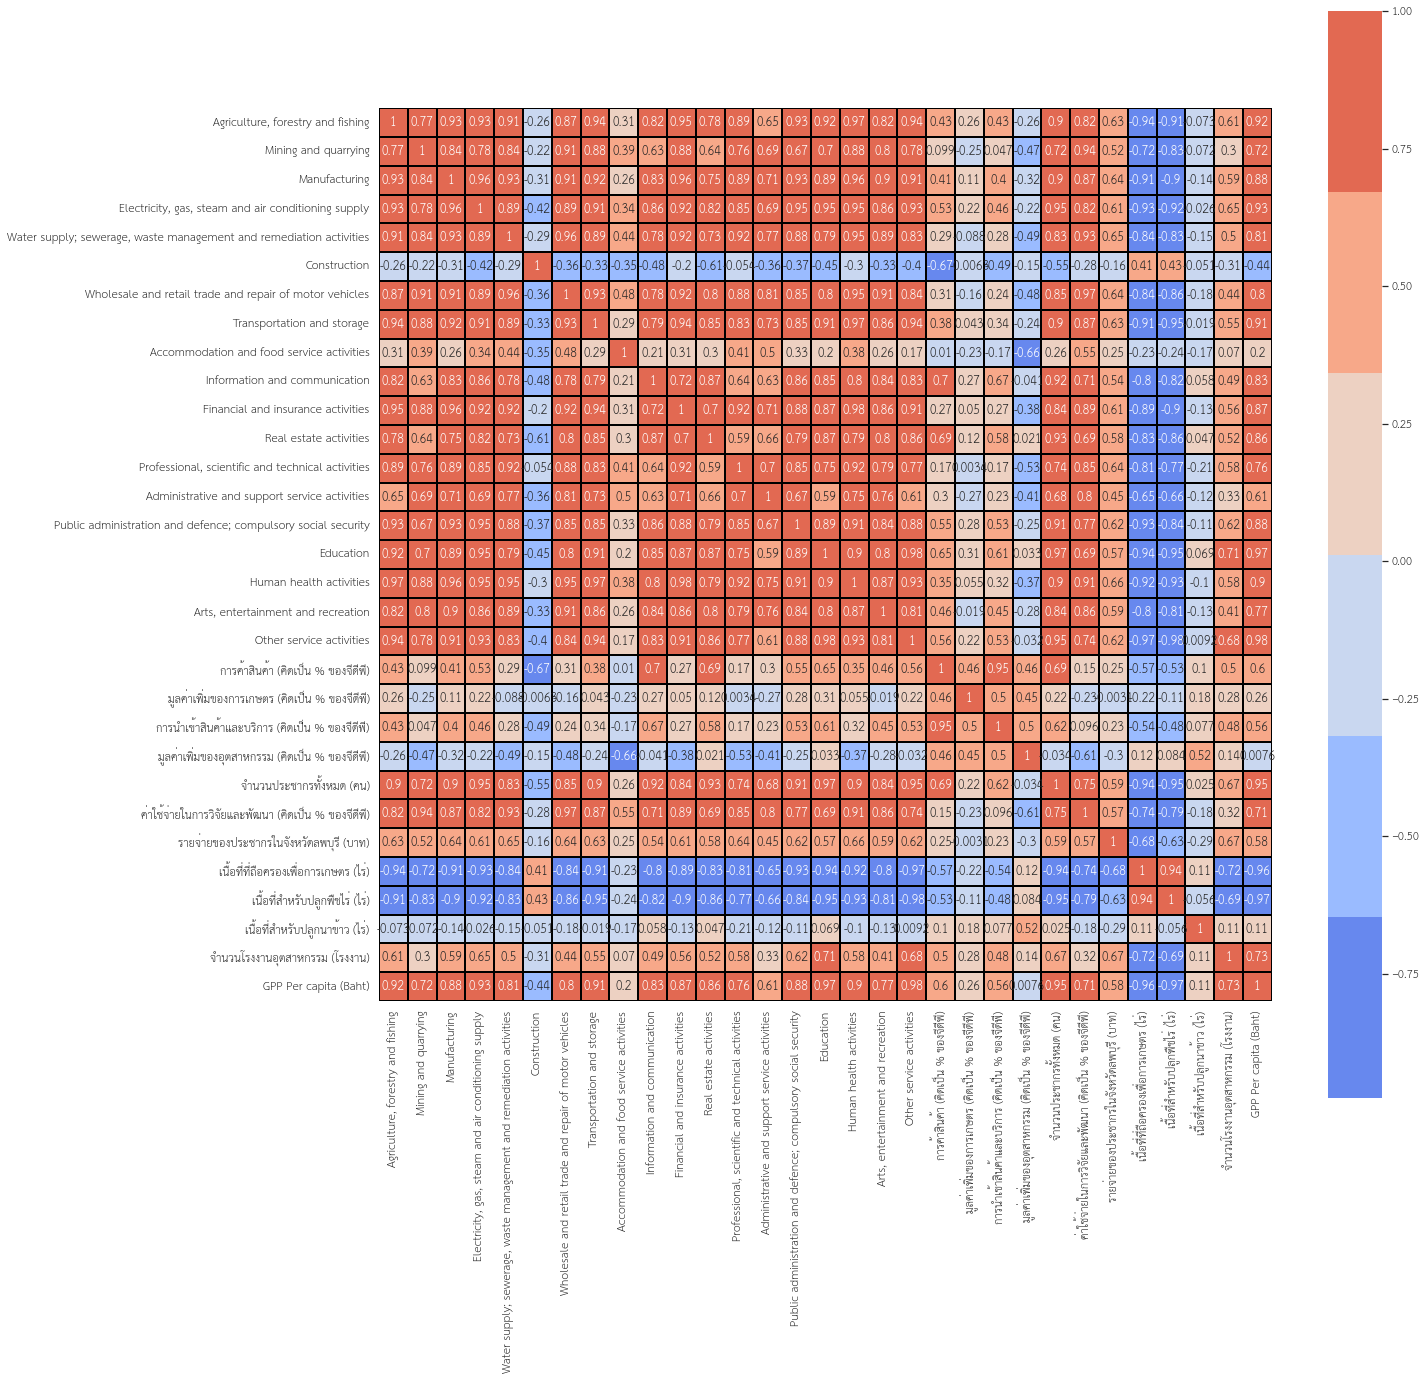

In [16]:
# Plot correlation of numerical data
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),
            square=True,
            linewidths=0.25,    
            linecolor=(0,0,0),
            cmap=sns.color_palette("coolwarm"),
            annot=True)

In [17]:
#remove high correlation Ref. https://chrisalbon.com/code/machine_learning/feature_selection/drop_highly_correlated_features/

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]


/var/folders/37/ffyx67ps24v157rdzs_y3pkc0000gn/T/ipykernel_3928/2449252667.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [18]:
to_drop

['Mining and quarrying',
 'Manufacturing',
 'Electricity, gas, steam and air conditioning supply',
 'Water supply; sewerage, waste management and remediation activities',
 'Wholesale and retail trade and repair of motor vehicles',
 'Transportation and storage',
 'Information and communication',
 'Financial and insurance activities',
 'Real estate activities',
 'Professional, scientific and technical activities',
 'Administrative and support service activities',
 'Public administration and defence; compulsory social security',
 'Education',
 'Human health activities',
 'Arts, entertainment and recreation',
 'Other service activities',
 'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
 'จำนวนประชากรทั้งหมด (คน)',
 'ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี)',
 'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
 'เนื้อที่สำหรับปลูกพืชไร่ (ไร่)',
 'GPP Per capita (Baht)']

In [19]:
len(to_drop)

22

In [20]:
not_high_corr = df.drop(to_drop,axis=1)
not_high_corr

,"Agriculture, forestry and fishing",Construction,Accommodation and food service activities,การค้าสินค้า (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดลพบุรี (บาท),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน)
Year,,,,,,,,,
1995,5391.575854,3391.005101,176.898917,75.157099,9.081225,37.278020,14642.057073,813441.826432,17
1996,6206.682558,7728.645631,153.858116,69.960893,9.063416,37.081286,14781.331342,813529.791485,18
1997,6014.415215,5647.894247,140.141879,80.036293,9.064902,36.564600,14820.227125,813554.357901,19
1998,6270.177149,3182.288913,474.662929,85.724670,10.259227,36.111727,14827.222516,813558.776161,19
1999,5684.674097,2304.876078,564.896952,85.911268,8.892995,36.378900,14873.804036,813588.196856,20
2000,6101.780818,1693.173646,585.615970,103.555413,8.499848,36.669408,15021.360675,813681.393019,22
2001,6704.374562,2188.246425,581.199996,105.514313,8.579287,36.321003,15020.951262,813681.134435,22
2002,6495.349803,2224.446078,242.565997,98.847475,8.692178,36.894431,15081.726568,813719.519868,22
2003,7014.641912,2001.449767,245.506522,102.539601,9.441355,37.918175,15210.819030,813801.054133,24


In [21]:
X3 = not_high_corr
y3 = df["GPP Per capita (Baht)"]
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=14)
lm = LinearRegression()
lm.fit(X3_train, y3_train)
y3_pred = lm.predict(X3_test)
[np.sqrt(metrics.mean_squared_error(y3_test,y3_pred)),metrics.r2_score(y3_test,y3_pred)]

[128122.95800144055, -0.25388878341561294]

## Wrapper Methods

#### Forward Feature Selection

In [22]:
from sklearn.feature_selection import f_regression
fstat, pval = f_regression(df[input_vars], df["GPP Per capita (Baht)"])
fstat

array([1.29109803e+02, 2.36232736e+01, 7.89365875e+01, 1.34895856e+02,
       4.14683893e+01, 5.23177536e+00, 3.89598564e+01, 1.11394324e+02,
       8.87678940e-01, 4.91314398e+01, 6.99104424e+01, 6.07412216e+01,
       2.97786982e+01, 1.30917538e+01, 7.61406751e+01, 4.07270244e+02,
       9.78503875e+01, 3.24514591e+01, 4.63535066e+02, 1.23520324e+01,
       1.59097573e+00, 1.01733388e+01, 1.26794429e-03, 2.25883162e+02,
       2.21948616e+01, 1.09044235e+01, 2.37114500e+02, 3.91306269e+02,
       2.75656484e-01, 2.45258546e+01])

In [23]:
pval

array([1.12553045e-10, 7.39181558e-05, 9.91696146e-09, 7.42365976e-11,
       1.76837598e-06, 3.21592809e-02, 2.78262568e-06, 4.48292815e-10,
       3.56338914e-01, 4.92418457e-07, 2.81390269e-08, 9.08406225e-08,
       1.75536692e-05, 1.52296759e-03, 1.35559221e-08, 1.10371670e-15,
       1.47049691e-09, 9.93496638e-06, 2.83943620e-16, 1.95466017e-03,
       2.20398133e-01, 4.23485789e-03, 9.71915885e-01, 4.72239760e-13,
       1.06273113e-04, 3.24521140e-03, 2.89493091e-13, 1.67617132e-15,
       6.04813692e-01, 5.91301358e-05])

In [24]:
# Set threshold to select subset of features based on f-test statistic

# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features selected from f-test statistic from forward feature selection

f_value_threshold = 400  # can adjust this value 
updated_vars = []
for i in range(0,len(input_vars)-1):
    if fstat[i] >= f_value_threshold:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Education', 'Other service activities']

In [25]:
X = df[updated_vars]
y = df["GPP Per capita (Baht)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[25061.300343161936, 0.9520252957121367]

#### Recursive Feature Elimination

In [26]:
df5 = df.copy()

In [27]:
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['GPP Per capita (Baht)']
n_features = 10  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features_to_select=n_features)
model = rfe.fit(X, y)

In [28]:
# rfe masks features that are selected as 1
model.ranking_

array([18,  1, 19,  7,  1, 11, 16,  2,  5,  3,  9,  6,  1,  4, 15, 13, 10,
        1,  8,  1,  1,  1,  1, 21,  1, 14, 20, 12, 17,  1])

In [29]:
# to obtain coefficients of features in regression model
model.estimator_.coef_

array([  133.78551618,   588.18312365,  1515.08464025,  -600.2953888 ,
        2569.67973445, 15435.03623646, -1992.35374559, 34263.84254956,
       66855.22808595,  1093.87363037])

In [30]:
# Note that input_vars = a list of 35 original features
# Here, updated_vars = a list of features selected from recursive feature elimination

updated_vars = []
for i in range(0,len(input_vars)-1):
    if model.ranking_[i] == 1:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Mining and quarrying',
 'Water supply; sewerage, waste management and remediation activities',
 'Professional, scientific and technical activities',
 'Arts, entertainment and recreation',
 'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี)',
 'การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี)',
 'ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี)']

In [31]:
## Perform regresssion with features selected from recursive feature elimination

X = df[updated_vars]
y = df['GPP Per capita (Baht)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

# R2 using features selected from rfe is quite low
# With this data, about 27 features need to be selected to get R2 > 0.5

[41400.24780187652, 0.8690784961833008]

## Embedded Methods

#### Regression & Lasso (L1)

In [32]:
X = df[input_vars]
y = df['GPP Per capita (Baht)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [33]:
# Perform regresssion with original 35 independent variables

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[71304.57436453443, 0.6116351754669775]

In [34]:
from sklearn.linear_model import Lasso

## Perform regresssion with embedded lasso 
## set alpha (weight of penalty term) = 1

lasso = Lasso(alpha=1)
model = lasso.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[192276.74101453202, -1.82396044221456]

In [35]:
[model.coef_, model.intercept_]

[array([ 1.56089421e+01,  3.92561049e+01, -2.42783150e+00,  3.60529829e+01,
        -3.08147747e+02, -7.95170332e+01,  1.09363365e+00, -1.36271655e+01,
        -1.90045965e+01,  2.67347952e+01,  2.08082331e+01, -1.89248145e+01,
        -4.81780078e+02, -5.29547429e+01,  5.41775320e+00, -2.88694136e+00,
        -9.06410059e+00, -1.96466381e+02,  1.54108156e+02, -3.76037804e+02,
        -3.32658353e+03,  1.28012635e+03,  4.88488980e+03, -4.03182845e-03,
        -6.45959451e+04,  3.86546225e+01, -5.46835376e-02,  7.25790006e-02,
        -1.85496230e+01, -9.42805985e+02]),
 15017944.71391735]

In [36]:
##  Filter features that has non-zero coefficients and sort coefficient from min to max
##  Note that argsort returns indices of array after sort
##  At the end, coef array = non-zero coeffients, sorted from min to max
##              update_vars = names of features corresponding to coef array

index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [input_vars[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

[-64595.945098654716,
 -3326.583528195002,
 -942.8059846769038,
 -481.78007828026284,
 -376.0378035902992,
 -308.14774696730154,
 -196.46638077221277,
 -79.51703324114307,
 -52.954742924366045,
 -19.004596492555397,
 -18.92481446407378,
 -18.549622985471526,
 -13.627165534222971,
 -9.064100585512533,
 -2.886941356327491,
 -2.427831503171946,
 -0.054683537639119116,
 -0.00403182845463378,
 0.07257900057930838,
 1.0936336490136591,
 5.4177532020719035,
 15.608942139125135,
 20.80823310281512,
 26.73479521803993,
 36.05298287023975,
 38.65462246187274,
 39.2561048519025,
 154.10815567619886,
 1280.126345550422,
 4884.889801822519]

In [37]:
update_vars

['ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี)',
 'จำนวนโรงงานอุตสาหกรรม (โรงงาน)',
 'Professional, scientific and technical activities',
 'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
 'Water supply; sewerage, waste management and remediation activities',
 'Arts, entertainment and recreation',
 'Construction',
 'Administrative and support service activities',
 'Accommodation and food service activities',
 'Real estate activities',
 'เนื้อที่สำหรับปลูกนาข้าว (ไร่)',
 'Transportation and storage',
 'Human health activities',
 'Education',
 'Manufacturing',
 'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
 'จำนวนประชากรทั้งหมด (คน)',
 'เนื้อที่สำหรับปลูกพืชไร่ (ไร่)',
 'Wholesale and retail trade and repair of motor vehicles',
 'Public administration and defence; compulsory social security',
 'Agriculture, forestry and fishing',
 'Financial and insurance activities',
 'Information and communication',
 'Electricity, gas, steam and air conditioning s

In [38]:
len(update_vars)

30

In [39]:
## Run another regression with lasso + alpha = 10

lasso2 = Lasso(alpha=10)
model2 = lasso2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred2)]

[192276.74101453202, -1.5250460495502418]

In [40]:
[model2.coef_, model2.intercept_]

[array([ 1.38737790e+01,  2.98097056e+01, -2.96638411e+00,  4.54395958e+01,
        -4.16461519e+02, -8.31395862e+01,  1.09299355e+00, -9.61685790e+00,
        -3.64901813e+01,  2.68851701e+01,  2.82040294e+01, -2.73525251e+01,
        -4.56850370e+02, -5.49537143e+01,  6.61477331e+00, -3.44213121e+00,
        -1.22417509e+01, -1.81999901e+02,  1.69252522e+02,  5.78904090e+01,
         6.47355036e+02,  1.37695624e+03,  1.41717856e+02, -7.16724532e-03,
        -0.00000000e+00,  3.54686440e+01, -5.80238750e-02,  2.39252992e-01,
        -1.02717869e+01, -5.24855333e+02]),
 8445161.106632268]

In [41]:
##  Filter features that has non-zero coefficients and sort coefficient from min to max

index = np.argsort(model2.coef_)
coef2 = [model2.coef_[index[i]] for i in range(len(model2.coef_))  if model2.coef_[index[i]] != 0]
update_vars2 = [input_vars[index[i]] for i in range(len(model2.coef_))  if model2.coef_[index[i]] != 0]
coef2

[-524.8553333713094,
 -456.85037024847543,
 -416.4615193819343,
 -181.9999012260165,
 -83.13958622564435,
 -54.95371425500153,
 -36.49018125514081,
 -27.35252514242096,
 -12.241750946669839,
 -10.271786858591225,
 -9.616857901658348,
 -3.442131210452529,
 -2.9663841083520297,
 -0.058023874985460286,
 -0.007167245317159064,
 0.23925299225390598,
 1.092993552313958,
 6.614773311020705,
 13.873779004501406,
 26.885170112837923,
 28.204029377979804,
 29.80970563152985,
 35.46864398177614,
 45.43959575301529,
 57.89040904950391,
 141.71785575936397,
 169.25252181037558,
 647.3550356419303,
 1376.9562364902172]

In [42]:
update_vars2

['จำนวนโรงงานอุตสาหกรรม (โรงงาน)',
 'Professional, scientific and technical activities',
 'Water supply; sewerage, waste management and remediation activities',
 'Arts, entertainment and recreation',
 'Construction',
 'Administrative and support service activities',
 'Accommodation and food service activities',
 'Real estate activities',
 'Human health activities',
 'เนื้อที่สำหรับปลูกนาข้าว (ไร่)',
 'Transportation and storage',
 'Education',
 'Manufacturing',
 'เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่)',
 'จำนวนประชากรทั้งหมด (คน)',
 'เนื้อที่สำหรับปลูกพืชไร่ (ไร่)',
 'Wholesale and retail trade and repair of motor vehicles',
 'Public administration and defence; compulsory social security',
 'Agriculture, forestry and fishing',
 'Information and communication',
 'Financial and insurance activities',
 'Mining and quarrying',
 'รายจ่ายของประชากรในจังหวัดลพบุรี (บาท)',
 'Electricity, gas, steam and air conditioning supply',
 'การค้าสินค้า (คิดเป็น % ของจีดีพี)',
 'มูลค่าเพิ่มของอุตสาหกรรม (

In [43]:
len(update_vars2)

29

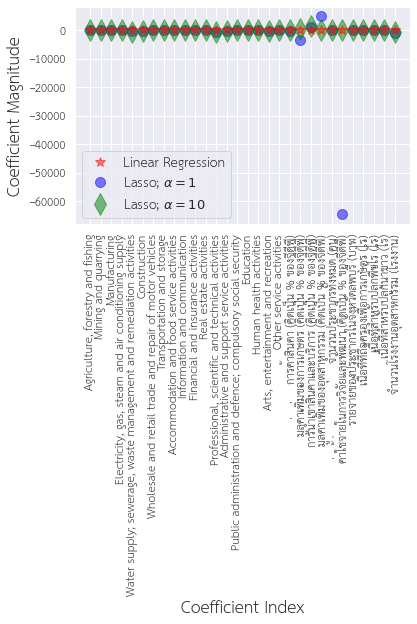

In [44]:
## Plot coefficients of linear regression model, regression with lasso + alpha=1,  regression with lasso + alpha=10
## Note that alpha parameter in plot indicates transparency of marker (it has nothing to do with alpha in lasso)

plt.plot(input_vars,lm.coef_,alpha=0.5,linestyle='none',marker='*',markersize=10,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(input_vars,model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=10,color='blue',label=r'Lasso; $\alpha = 1$') # alpha here is for transparency
plt.plot(input_vars,model2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=15,color='green',label=r'Lasso; $\alpha = 10$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='lower left')
plt.xticks(input_vars, input_vars, rotation='vertical')
plt.show()